In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
df = pd.read_csv('RRCA_baseflow.csv')
input_df = df.drop(['Observed'], axis=1)
output_df = df[['Observed']]
df.head(5)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [3]:
df_LR = LR()
df_LR.fit(input_df, output_df)
display(df_LR.score(input_df, output_df))

0.23561219615552864

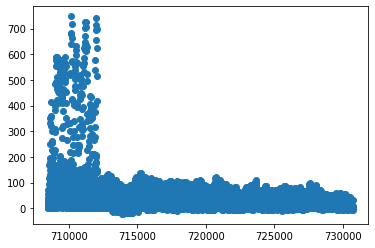

In [4]:
general_plot_df = df[['Date', 'Observed']]
general_plot_df.head(5)
plt.figure()
plt.scatter(general_plot_df.Date.values, general_plot_df.Observed.values)

# Breaking it down into river segments

In [20]:
data_frame_list = []
r_scores_for_each_segment = []
all_grid_scores = []
for segment in df.Segment_id.unique():
    current_segment = df[df.Segment_id == segment]
    segment_input = current_segment.drop(['Observed'], axis=1)
    segment_output = current_segment[['Observed']]
    segment_LR = LR()
    segment_LR.fit(segment_input, segment_output)
    columns = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']
    r_scores_for_each_segment.append(segment_LR.score(segment_input, segment_output))

    grid_results = []
    for j in columns:
        new_input = current_segment[[j]]
        #display(new_input.shape, segment_output.shape)
        grid_LR = LR()
        grid_LR.fit(new_input, segment_output)
        grid_results.append(grid_LR.score(new_input, segment_output))
    grid1, grid2, grid3 = grid_results[0], grid_results[1], grid_results[2]
    all_grid_scores.append(grid_results)
  
#     test_df = current_segment[['Evapotranspiration', 'Precipitation']]
#     display(test_df.head(5))
    other_grid = []
    for k in range(3):
        for x in range(3):
            if x <= k:
                continue
            else:
                new_df = current_segment[[columns[k], columns[x]]]
                other_grid_LR = LR()
                other_grid_LR.fit(new_df, segment_output)
                other_grid.append(other_grid_LR.score(new_df, segment_output))
    other_grid1, other_grid2, other_grid3 = other_grid[0], other_grid[1], other_grid[2]
    data_frame_list.append([segment, grid1, grid2, grid3, other_grid1, other_grid2, other_grid3, segment_LR.score(segment_input, segment_output)])
                
#display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores_for_each_segment)
#display('all the grid scores\n', all_grid_scores)
column_df = ['segmentId', 'Evapotranspiration', 'Precipitation', 'IrrigationPumping', 'EvapotranspirationAndPrecipitation',
             'EvapotranspirationAndIrrigationPumping', 'PrecipitationAndIrrigationPumping', 'all3Used']
full_df = pd.DataFrame(data_frame_list, columns = column_df)
#full_df.head(5)
full_df.save_csv(index = False)

'segmentId,Evapotranspiration,Precipitation,IrrigationPumping,EvapotranspirationAndPrecipitation,EvapotranspirationAndIrrigationPumping,PrecipitationAndIrrigationPumping,all3Used\r\n144,0.03928260689272178,0.0007044612286625229,0.04610856722373258,0.040650597180940884,0.06508544839658226,0.046888387363701156,0.17751164558989696\r\n154,0.0865247423656449,0.12437657101152753,0.06526862570225667,0.20296994428081816,0.09141499748242843,0.18072338701165402,0.2260057220798466\r\n176,0.14060016307122503,0.47361073407836635,0.0845464403352435,0.5751546847299771,0.16376181598717698,0.4841389105973487,0.7228967066548906\r\n171,0.0023416657669337315,0.02505125701450006,0.005617728920467191,0.025491127546690917,0.005808002137933087,0.030133064080052452,0.09507460484814512\r\n152,0.1285744597087991,0.3581441236762791,0.019181068993281647,0.37104781724693403,0.18532067913384567,0.38197599502321905,0.40416695953105497\r\n55,0.04679377886316571,0.029554548857466334,0.06977291941638553,0.08336863490031

In [6]:
# r_scores = []
# for segment in df.Segment_id.unique():
#     current_segment = df[df.Segment_id == segment]
#     segment_input = current_segment.drop(['Observed', 'Segment_id'], axis=1)
#     display(segment_input.head(5))
#     segment_output = current_segment[['Observed']]
#     segment_LR = LR()
#     segment_LR.fit(segment_input, segment_output)
#     r_scores.append(segment_LR.score(segment_input, segment_output))
# display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores)
